In [2]:
import pandas as pd
import matplotlib as plt

# Trabalhadores

In [3]:
df_trabalhadores = pd.read_csv("D_ETL_IMO_EXTRACAO_SINE_ABERTO_TRABALHADORES_SP.csv", sep=";", encoding="iso8859-1")

/home/chris/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print(df_trabalhadores.shape)
df_trabalhadores.head()

(3862204, 20)


,NACIONALIDADE,DEFICIENCIAS,BAIRRO,CEP,CODIGO_MUNICIPIO_IBGE,NOME_MUNICIPIO,UF,ESCOLARIDADE,ESTUDANTE,CURSOS_PROFISSIONALIZANTES,GRADUACOES,POS_GRADUACOES,IDIOMAS,HABILITACAO,VEICULOS,DISP_VIAJAR,DISP_DORMIR_EMP,DISP_AUSENTAR_DOMIC,PRETENSOES,MUNICIPIOS_INTERESSE
0,BRASILEIRA,NaN,VILA UNIDOS,1.22145e+07,354990,SAO JOSE DOS CAMPOS,SP,Superior Incompleto,S,NaN,projetos de estruturas aeronautica,NaN,NaN,AB,N,N,N,N,"521110-Vendedor de comércio varejista(N,54,0,I...",NaN
1,BRASILEIRA,NaN,MONTANHAO,9.78414e+06,354870,SAO BERNARDO DO CAMPO,SP,Médio Completo,N,NaN,NaN,NaN,NaN,Nenhum,N,N,N,N,"513505-Ajudante de cozinha(N,0,0,Indiferente)|...",NaN
2,BRASILEIRA,NaN,JARDIM SANTA TEREZINHA (ZON,8.43002e+06,355030,SAO PAULO,SP,Médio Completo,N,NaN,NaN,NaN,NaN,Nenhum,N,N,N,N,"411005-Auxiliar administrativo(N,0,0,Indiferen...",NaN
3,BRASILEIRA,NaN,NaN,6.62613e+06,352500,JANDIRA,SP,Médio Completo,S,NaN,NaN,NaN,NaN,Nenhum,N,S,N,N,"413205-ATENDENTE DE AGENCIA(S,0,0,Indiferente)...",NaN
4,BRASILEIRA,NaN,NaN,1.80654e+07,355220,SOROCABA,SP,Médio Completo,N,NaN,pedagogia,NaN,NaN,Nenhum,N,S,S,S,"422305-OPERADOR DE TELEMARKETING ATIVO(N,17,0,...",NaN


In [5]:
df_trabalhadores.columns

Index(['NACIONALIDADE', 'DEFICIENCIAS', 'BAIRRO', 'CEP',
       'CODIGO_MUNICIPIO_IBGE', 'NOME_MUNICIPIO', 'UF', 'ESCOLARIDADE',
       'ESTUDANTE', 'CURSOS_PROFISSIONALIZANTES', 'GRADUACOES',
       'POS_GRADUACOES', 'IDIOMAS', 'HABILITACAO', 'VEICULOS', 'DISP_VIAJAR',
       'DISP_DORMIR_EMP', 'DISP_AUSENTAR_DOMIC', 'PRETENSOES',
       'MUNICIPIOS_INTERESSE'],
      dtype='object')

### preprocess pretensoes antes da agregação

In [9]:
df_trabalhadores.isna().sum()

NACIONALIDADE                       0
DEFICIENCIAS                  3830214
BAIRRO                        1016628
CEP                               203
CODIGO_MUNICIPIO_IBGE               0
NOME_MUNICIPIO                      0
UF                                  0
ESCOLARIDADE                        0
ESTUDANTE                           1
CURSOS_PROFISSIONALIZANTES    2928149
GRADUACOES                    3358268
POS_GRADUACOES                3851581
IDIOMAS                       3721559
HABILITACAO                         0
VEICULOS                            0
DISP_VIAJAR                         0
DISP_DORMIR_EMP                     0
DISP_AUSENTAR_DOMIC                 1
PRETENSOES                      58249
MUNICIPIOS_INTERESSE          3592472
dtype: int64

In [11]:
df_trabalhadores.dropna(subset=['PRETENSOES'], inplace=True)

In [13]:
df_trabalhadores.isna().sum()

NACIONALIDADE                       0
DEFICIENCIAS                  3772836
BAIRRO                        1016613
CEP                                84
CODIGO_MUNICIPIO_IBGE               0
NOME_MUNICIPIO                      0
UF                                  0
ESCOLARIDADE                        0
ESTUDANTE                           0
CURSOS_PROFISSIONALIZANTES    2870764
GRADUACOES                    3301731
POS_GRADUACOES                3793675
IDIOMAS                       3664909
HABILITACAO                         0
VEICULOS                            0
DISP_VIAJAR                         0
DISP_DORMIR_EMP                     0
DISP_AUSENTAR_DOMIC                 0
PRETENSOES                          0
MUNICIPIOS_INTERESSE          3534223
dtype: int64

In [17]:
df_trabalhadores[['PRETENSOES','LIXO']] = df_trabalhadores.PRETENSOES.str.split("(",1,expand=True)

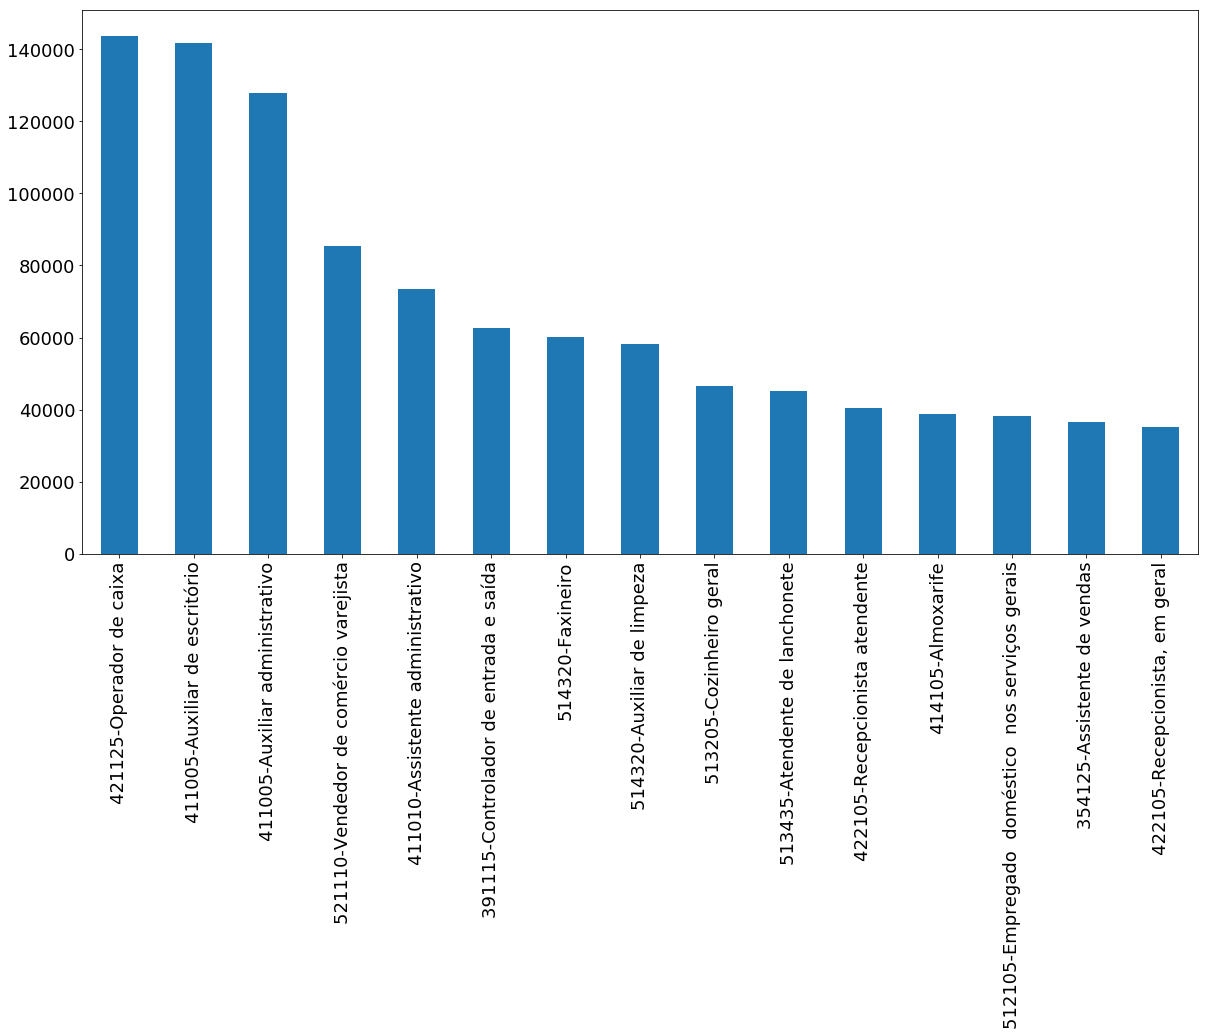

In [18]:
df_trabalhadores.PRETENSOES.value_counts()[:15].plot.bar(figsize=(20,10), fontsize=18);

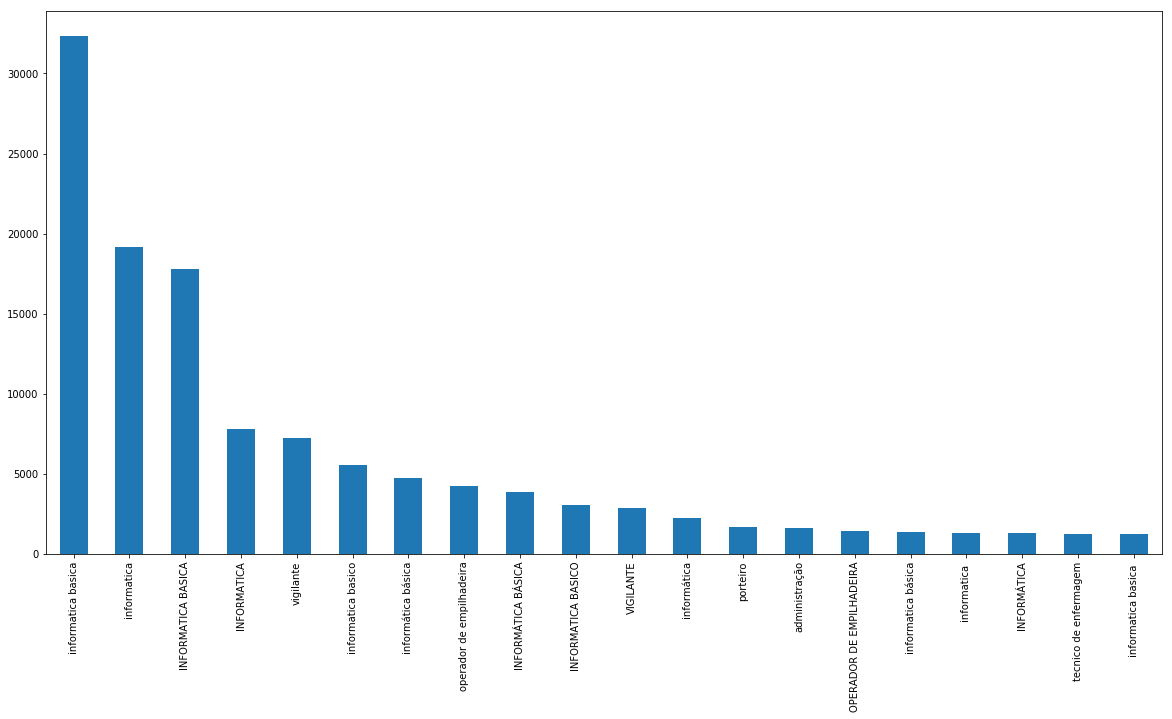

In [28]:
df_trabalhadores.CURSOS_PROFISSIONALIZANTES.value_counts()[:20].plot.bar(figsize=(20,10));

# Vagas

In [19]:
df_vagas = pd.read_csv("D_ETL_IMO_EXTRACAO_SINE_ABERTO_VAGAS_SP.csv", sep=";", encoding="iso8859-1")

In [20]:
print(df_vagas.shape)
df_vagas.head()

(98, 12)


,CODIGO_OCUPACAO,TITULO_OCUPACAO,OBSERVACOES_OCUPACAO,CODIGO_MUNICIPIO_IBGE,CEP,VALOR_SALARIO,QTD_VAGAS,TIPO_CONTRATACAO,QTD_EXPERIENCIA,ESCOLARIDADE,REQUERIDO_DEFICIENCIA,DEFICIENCIAS
0,317110,Programador de computador,teste de sistema numero 2.,354880,9530000,0.0,5,0 - Estágio,0,7 - Médio Completo,0,3 - Cadeirante - Física
1,414105,Auxiliar de almoxarifado,NaN,350570,6460200,0.0,2,3 - Permanente,6,7 - Médio Completo,0,0 - Surdez bilateral parcial - Auditiva
2,784105,"Empacotador, a mão","Irá trabalhar junto com a operadora de caixa, ...",351640,7851040,0.0,5,3 - Permanente,0,7 - Médio Completo,0,13 - Baixa Visão - Visual
3,521125,Repositor - em supermercados,NaN,355100,11330690,0.0,3,3 - Permanente,0,0 - Nenhum,0,0 - Surdez bilateral parcial - Auditiva
4,763210,Costureira em geral,"Sexo feminino, com carteira de trabalho, dispo...",353880,18800000,0.0,1,3 - Permanente,1,0 - Nenhum,0,2 - Amputação - Física


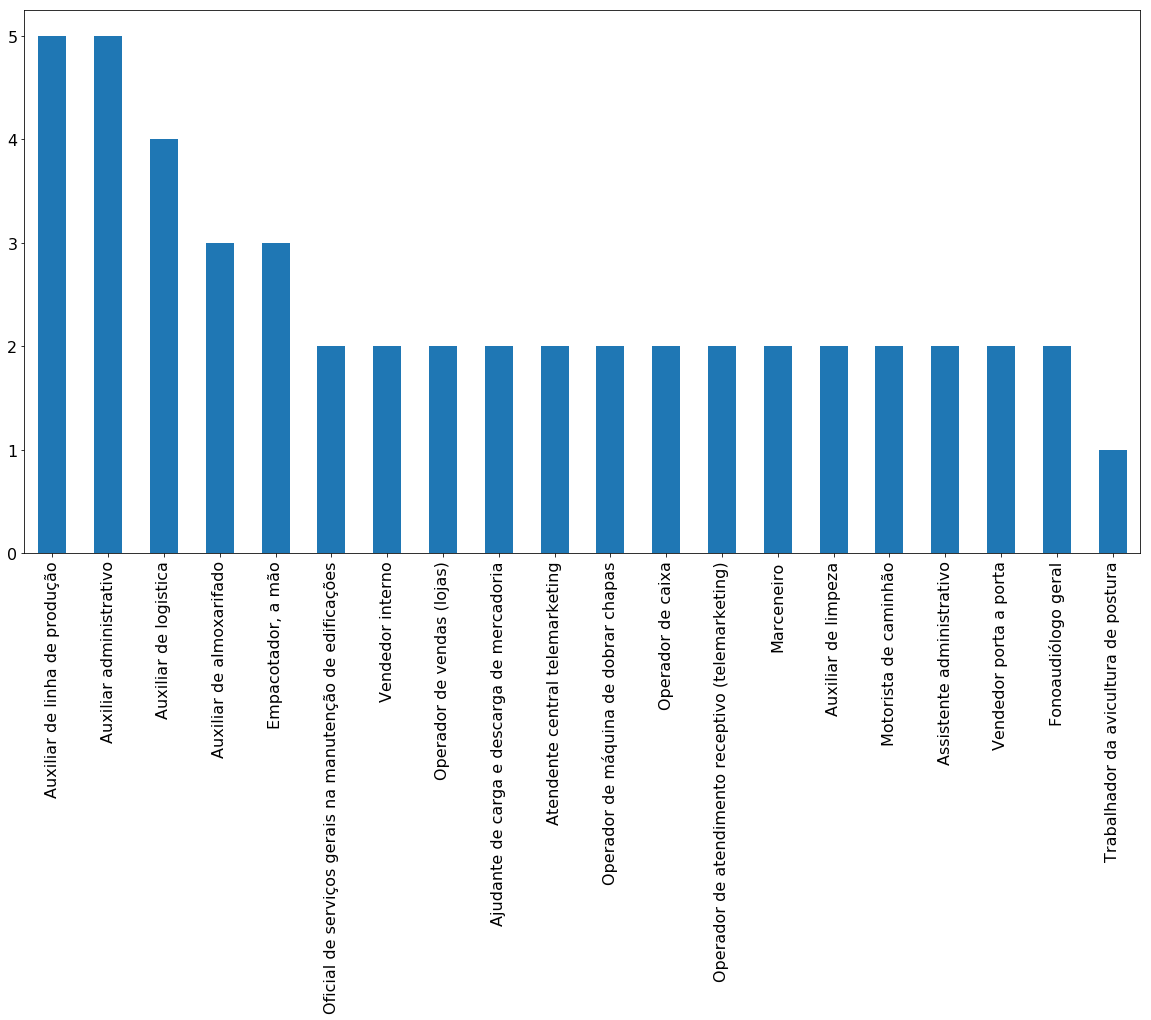

In [25]:
df_vagas.TITULO_OCUPACAO.value_counts()[:20].plot.bar(figsize=(20,10), fontsize=16);

In [29]:
df_vagas.shape[0]/df_trabalhadores.shape[0]

2.576266017868245e-05

In [30]:
df_trabalhadores.shape[0] / df_vagas.shape[0]

38815.86734693877